 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



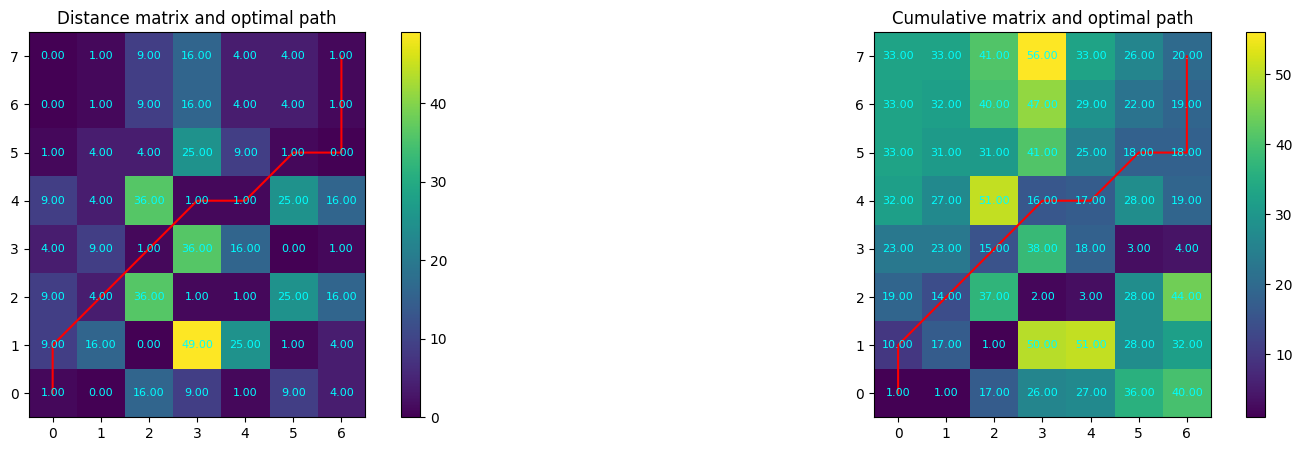

array([[ 1.,  0., 16.,  9.,  1.,  9.,  4.],
       [ 9., 16.,  0., 49., 25.,  1.,  4.],
       [ 9.,  4., 36.,  1.,  1., 25., 16.],
       [ 4.,  9.,  1., 36., 16.,  0.,  1.],
       [ 9.,  4., 36.,  1.,  1., 25., 16.],
       [ 1.,  4.,  4., 25.,  9.,  1.,  0.],
       [ 0.,  1.,  9., 16.,  4.,  4.,  1.],
       [ 0.,  1.,  9., 16.,  4.,  4.,  1.]])

In [52]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################





    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =  np.zeros((len(sequence1), len(sequence2)))  #Cummulative distance matrix
    DTW_cumulate_Matrix[0][0] = (sequence1[0]-sequence2[0])**2
    for i in range(1, len(sequence1)):
        DTW_cumulate_Matrix[i][0] = (sequence1[i]-sequence2[0])**2 + DTW_cumulate_Matrix[i-1][0]
    for j in range(1, len(sequence2)):
        DTW_cumulate_Matrix[0][j] = (sequence1[0]-sequence2[j])**2 + DTW_cumulate_Matrix[0][j-1]

    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,len(sequence1),1): #you can start from 1
        for j in range(1,len(sequence2),1):
            current_distance = (sequence1[i]-sequence2[j])**2     #Compute the distance between the two points

            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

            DTW_cumulate_Matrix[i][j] = current_distance + min(DTW_cumulate_Matrix[i-1][j-1],
                                                               DTW_cumulate_Matrix[i-1][j],
                                                               DTW_cumulate_Matrix[i][j-1])






    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i =  len(sequence1)-1 # length of the sequence1
    j =  len(sequence2)-1 # length of the sequence2
    path = [(i,j)]
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_index = np.argmin([
            DTW_cumulate_Matrix[i - 1][j],
            DTW_cumulate_Matrix[i - 1][j - 1],
            DTW_cumulate_Matrix[i][j - 1]
        ])

        # Add the current indexes distance
        opt_distance = opt_distance + (sequence1[i] - sequence2[j])**2  #Compute the distance between the points sequence1[i] and sequence2[j]

        #Store the required indexes to obtain the optimal path
        if min_index == 0:
            i -= 1
        elif min_index == 1:
            i -= 1
            j -= 1
        else:
            j -= 1

        path.append((i,j))

    if(i!= 0 and j == 0):
        while(i!=0):
            i -= 1
            path.append((i,j))
    elif(j!= 0 and i == 0):
        while(j!=0):
            j -= 1
            path.append((i,j))
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return DTW_cumulate_Matrix ,path, opt_distance


def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    D = np.zeros((len(sequence1), len(sequence2)))
    #Compute distance and cumulative distance between the given templates
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            D[i, j] = (sequence1[i] - sequence2[j])**2
    #Obtain the optimal path using "DTW" function

    C, path, opt_distance = DTW(sequence1, sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes

    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.imshow(D, origin='lower', cmap='viridis', interpolation='nearest')
    plt.plot([point[1] for point in path], [point[0] for point in path], 'r')
    plt.colorbar()
    plt.title('Distance matrix and optimal path')

    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            plt.text(j, i, f'{D[i, j]:.2f}', ha='center', va='center', color='cyan', size = 8)

    plt.subplot(122)
    plt.imshow(C, origin='lower', cmap='viridis', interpolation='nearest')
    plt.plot([point[1] for point in path], [point[0] for point in path], 'r')
    plt.colorbar()
    plt.title('Cumulative matrix and optimal path')

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            plt.text(j, i, f'{C[i, j]:.2f}', ha='center', va='center', color='cyan', size = 8)

    plt.show()
    return D

sequence2 = [4, 3, 7, 0, 2, 6, 5]
sequence1 = [3, 7, 1, 6, 1, 5, 4, 4]
plotDTWpath(sequence1, sequence2)


<b> Report your observations </b>

1. For each index (i,j) of the grid, we calculate the most optimum distance from (0,0).  

2. At last we choose the value of (m,n) from the cumulative matrix to compute overall the shortest path.

3. DTW effectively calculates the distance between two non-linear sequences.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [53]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [54]:
from google.colab import drive
import os
from pydub import AudioSegment
import numpy as np
import scipy.io.wavfile
from IPython.display import Audio
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy
from io import BytesIO

# Mount Google Drive
drive.mount('/content/drive')

# Function to upload audio files from a folder in Google Drive
def upload_audio_from_folder(folder_path):
    uploaded_files = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):  # Assuming the audio files are in WAV format
            file_path = os.path.join(folder_path, filename)
            rate, sig = wav.read(file_path)
            sig = sig - np.mean(sig)
            mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, nfft=2048, lowfreq=20, highfreq=4000, winfunc=np.hamming)
            mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
            uploaded_files[filename] = mfcc_feat_cmvn
    return uploaded_files

# Function to process uploaded audio files
def process_uploaded_files(uploaded_files):
    processed_data = {}
    for filename, mfcc_features in uploaded_files.items():
        print(f'Processing file: {filename}')
        processed_data[int(filename.split('.')[0])-1] = mfcc_features  # Store processed data for further use
        print('Processing completed for file:', filename)
    return processed_data

# Specify the folders containing audio files in Google Drive
folder_path1 = '/content/drive/My Drive/tr/'
folder_path2 = '/content/drive/My Drive/te1/'
folder_path3 = '/content/drive/My Drive/te2/'
folder_path4 = '/content/drive/My Drive/te3/'

# Upload audio files from the specified folders and process them
processed_data1 = process_uploaded_files(upload_audio_from_folder(folder_path1))
processed_data2 = process_uploaded_files(upload_audio_from_folder(folder_path2))
processed_data3 = process_uploaded_files(upload_audio_from_folder(folder_path3))
processed_data4 = process_uploaded_files(upload_audio_from_folder(folder_path4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing file: 9.wav
Processing completed for file: 9.wav
Processing file: 10.wav
Processing completed for file: 10.wav
Processing file: 6.wav
Processing completed for file: 6.wav
Processing file: 3.wav
Processing completed for file: 3.wav
Processing file: 5.wav
Processing completed for file: 5.wav
Processing file: 2.wav
Processing completed for file: 2.wav
Processing file: 4.wav
Processing completed for file: 4.wav
Processing file: 1.wav
Processing completed for file: 1.wav
Processing file: 7.wav
Processing completed for file: 7.wav
Processing file: 8.wav
Processing completed for file: 8.wav
Processing file: 5.wav
Processing completed for file: 5.wav
Processing file: 6.wav
Processing completed for file: 6.wav
Processing file: 8.wav
Processing completed for file: 8.wav
Processing file: 4.wav
Processing completed for file: 4.wav
Processing file: 9.wav
Proces

In [55]:
# for key, arr2D in processed_data1.items():
#     processed_data1[key] = arr2D.flatten()

# for key, arr2D in processed_data2.items():
#     processed_data2[key] = arr2D.flatten()

# for key, arr2D in processed_data3.items():
#     processed_data3[key] = arr2D.flatten()

# for key, arr2D in processed_data4.items():
#     processed_data4[key] = arr2D.flatten()

**Algorithm to perform isolated digit recognition**

In [56]:
def vectorDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################





    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))

    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            current_distance = np.sum((sequence1[i] - sequence2[j])**2)

            DTW_cumulate_Matrix[i][j] = current_distance

    # Compute the cumulative distance matrix

    for i in range(1, len(sequence1)):
        DTW_cumulate_Matrix[i][0] += DTW_cumulate_Matrix[i-1][0]

    for j in range(1, len(sequence2)):
        DTW_cumulate_Matrix[0][j] += DTW_cumulate_Matrix[0][j-1]

    for i in range(1, len(sequence1)):
        for j in range(1, len(sequence2)):
            DTW_cumulate_Matrix[i][j] += min(
                DTW_cumulate_Matrix[i-1][j],
                DTW_cumulate_Matrix[i-1][j-1],
                DTW_cumulate_Matrix[i][j-1]
            )




    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = DTW_cumulate_Matrix[-1][-1]  # Optimal distance is the value at the bottom-right cell of the matrix
    i, j = len(sequence1) - 1, len(sequence2) - 1
    path = [(i, j)]

    # Backtrack to find the optimal path
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_index = np.argmin([
                DTW_cumulate_Matrix[i-1][j],
                DTW_cumulate_Matrix[i-1][j-1],
                DTW_cumulate_Matrix[i][j-1]
            ])
            if min_index == 0:
                i -= 1
            elif min_index == 1:
                i -= 1
                j -= 1
            else:
                j -= 1
        path.append((i, j))

    # Reverse the path to start from (0, 0)
    path.reverse()

    return DTW_cumulate_Matrix, path, opt_distance
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return DTW_cumulate_Matrix ,path, opt_distance



def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    D = np.zeros((len(sequence1), len(sequence2)))
    #Compute distance and cumulative distance between the given templates
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            D[i, j] = (sequence1[i] - sequence2[j])**2
    #Obtain the optimal path using "DTW" function

    C, path, opt_distance = DTW(sequence1, sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes

    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.imshow(D, origin='lower', cmap='viridis', interpolation='nearest')
    plt.plot([point[1] for point in path], [point[0] for point in path], 'r')
    plt.colorbar()
    plt.title('Distance matrix and optimal path')

    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            plt.text(j, i, f'{D[i, j]:.2f}', ha='center', va='center', color='cyan', size = 8)

    plt.subplot(122)
    plt.imshow(C, origin='lower', cmap='viridis', interpolation='nearest')
    plt.plot([point[1] for point in path], [point[0] for point in path], 'r')
    plt.colorbar()
    plt.title('Distance matrix and optimal path')

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            plt.text(j, i, f'{C[i, j]:.2f}', ha='center', va='center', color='cyan', size = 8)

    plt.show()

d_te1 = np.zeros((len(processed_data2), len(processed_data1)))
for i in range(len(processed_data2)):
    for j in range(len(processed_data1)):
        _, _, opt_dist = vectorDTW(processed_data1[j], processed_data2[i])
        d_te1[i][j] = opt_dist

d_te2 = np.zeros((len(processed_data3), len(processed_data1)))
for i in range(len(processed_data3)):
    for j in range(len(processed_data1)):
        _, _, opt_dist = vectorDTW(processed_data1[j], processed_data3[i])
        d_te2[i][j] = opt_dist

d_te3 = np.zeros((len(processed_data4), len(processed_data1)))
for i in range(len(processed_data4)):
    for j in range(len(processed_data1)):
        _, _, opt_dist = vectorDTW(processed_data1[j], processed_data4[i])
        d_te3[i][j] = opt_dist

In [57]:
x = np.array([[1,2,3], [2,3,4]])
y = np.array([[1,2,3], [2,3,4], [2,3,4], [2,3,4]])
_,_,_ = vectorDTW(x, y)

**Plot the optimal DTW path**

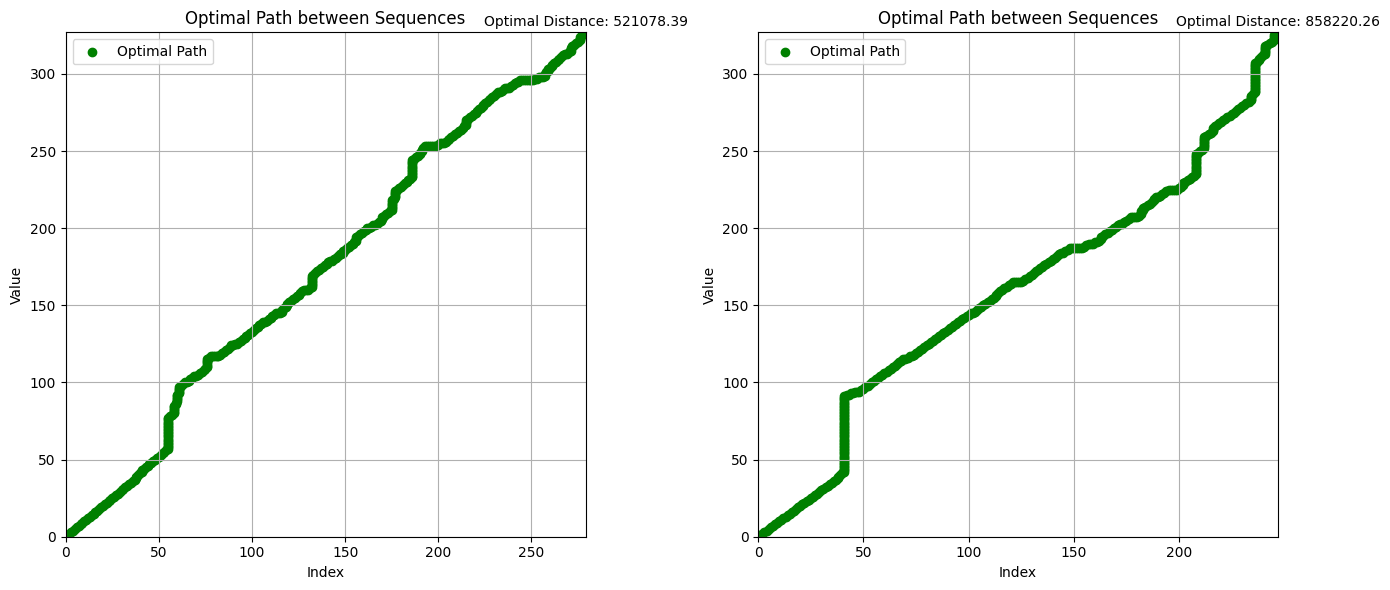

In [58]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def plotDTW(sequence1, sequence2, ax=None):
    C, path, opt_distance = vectorDTW(sequence1, sequence2)
    width = len(sequence2)
    height = len(sequence1)
    if ax is None:
        fig, ax = plt.subplots(figsize=(width / 100, height / 100))  # Adjusting figure size based on sequence dimensions

    path_x = [point[1] for point in path]
    path_y = [point[0] for point in path]
    ax.scatter(path_x, path_y, c='g', label='Optimal Path')
    text_x = width
    text_y = height*1.02
    ax.text(text_x, text_y, f'Optimal Distance: {opt_distance:.2f}', fontsize=10, ha='center', va='center')

    ax.legend()
    ax.set_title('Optimal Path between Sequences')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.grid(True)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot pair1
plotDTW(processed_data1[3], processed_data2[3], ax=axs[0])

# Plot pair2
plotDTW(processed_data1[3], processed_data2[9], ax=axs[1])

plt.tight_layout()
plt.show()

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [59]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def accuracy(distance):
    correct = 0

    for i in range(len(distance)):
        if(np.argmin(distance[i]) == i):
            correct += 1

    return correct/len(distance)

acc_te1 = accuracy(d_te1)
print("Accuracy for test-case1: ", acc_te1*100)

acc_te2 = accuracy(d_te2)
print("Accuracy for test-case2: ", acc_te2*100)

acc_te3 = accuracy(d_te3)
print("Accuracy for test-case3: ", acc_te3*100)

def confusion_matrix(d_te1):
    num_digits = len(d_te1)
    confusion_matrix = np.zeros((num_digits, num_digits), dtype=int)

    for i in range(num_digits):
        for j in range(num_digits):
            predicted_digit = np.argmin(d_te1[i])
            if predicted_digit == j:
                confusion_matrix[i][j] += 1

    return confusion_matrix

c1 = confusion_matrix(d_te1)
c2 = confusion_matrix(d_te2)
c3 = confusion_matrix(d_te3)

print("Confusion matrix for test case-1")
print(c1)
print("Confusion matrix for test case-2")
print(c2)
print("Confusion matrix for test case-3")
print(c3)

print("Combined accuracy: ", ((acc_te3 * 3 + acc_te3*3 + acc_te3*3)/9) * 100)
print("Combined confusion matrix:")
cm = list(np.array((np.array(c1) + np.array(c2) + np.array(c3)).flatten().reshape(10,10)))
for i in range(10):
    print(cm[i])

Accuracy for test-case1:  100.0
Accuracy for test-case2:  100.0
Accuracy for test-case3:  100.0
Confusion matrix for test case-1
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
Confusion matrix for test case-2
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
Confusion matrix for test case-3
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
Combined accuracy:  100.0
Combined confusion matrix:
[3 0 0 0 0 0 0 0 0 0]
[0 3 0 0 0 0 0 0 0 0]
[0 0 3 0 0 0 0 

<b> Report your observations </b>

1. DTW here gives a high accuracy when ran against all the three test cases.

2. Even with some random pairs of digits (i, i) and (i, j) where j != i, DTW effectively shows the distance gap between the two cases and hence turns out to be very effective. In our case i = 3 and j = 9.

3. The accuracy is very good as is seen in the above result and it is also shown by the confusion matrix being diagonal.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [60]:
# Mount Google Drive
drive.mount('/content/drive')

# Function to upload audio files from a folder in Google Drive
def upload_audio_from_folder(folder_path):
    uploaded_files = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):  # Assuming the audio files are in WAV format
            file_path = os.path.join(folder_path, filename)
            rate, sig = wav.read(file_path)
            sig = sig - np.mean(sig)
            mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, nfft=2048, lowfreq=20, highfreq=4000, winfunc=np.hamming)
            mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
            uploaded_files[filename] = mfcc_feat_cmvn
    return uploaded_files

# Function to process uploaded audio files
def process_uploaded_files(uploaded_files):
    processed_data = {i: [] for i in range(10)}  # Initialize processed_data as a dictionary with keys '0' to '9'

    for filename, mfcc_features in uploaded_files.items():
        print(f'Processing file: {filename}')
        f_name = filename.split('.')[0]
        num = f_name.split('_')
        digit = int(num[0])
        processed_data[digit].append(mfcc_features)  # Store MFCC features in the list corresponding to the digit
        print('Processing completed for file:', filename)

    return processed_data
# Specify the folders containing audio files in Google Drive
folder_path1 = '/content/drive/My Drive/jackson/'
folder_path2 = '/content/drive/My Drive/nicolas/'
folder_path3 = '/content/drive/My Drive/theo/'
folder_path4 = '/content/drive/My Drive/yweweler/'

# Upload audio files from the specified folders and process them
data_j = process_uploaded_files(upload_audio_from_folder(folder_path1))
data_n = process_uploaded_files(upload_audio_from_folder(folder_path2))
data_t = process_uploaded_files(upload_audio_from_folder(folder_path3))
data_y = process_uploaded_files(upload_audio_from_folder(folder_path4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing file: 7_jackson_46.wav
Processing completed for file: 7_jackson_46.wav
Processing file: 1_jackson_17.wav
Processing completed for file: 1_jackson_17.wav
Processing file: 7_jackson_5.wav
Processing completed for file: 7_jackson_5.wav
Processing file: 3_jackson_39.wav
Processing completed for file: 3_jackson_39.wav
Processing file: 3_jackson_30.wav
Processing completed for file: 3_jackson_30.wav
Processing file: 9_jackson_19.wav
Processing completed for file: 9_jackson_19.wav
Processing file: 7_jackson_18.wav
Processing completed for file: 7_jackson_18.wav
Processing file: 9_jackson_48.wav
Processing completed for file: 9_jackson_48.wav
Processing file: 2_jackson_24.wav
Processing completed for file: 2_jackson_24.wav
Processing file: 6_jackson_34.wav
Processing completed for file: 6_jackson_34.wav
Processing file: 3_jackson_42.wav
Processing complete

In [61]:
# print(len(data_j[0]))
# print(len(data_j[1]))
# print(len(data_j[2]))
# print(len(data_j[3]))
# print(len(data_j[4]))
# print(len(data_j[5]))
# print(len(data_j[6]))
# print(len(data_j[7]))
# print(len(data_j[8]))
# print(len(data_j[9]))


In [62]:
def split_data(data, train_ratio=0.2):
    train_data = {}
    test_data = {}
    for digit, samples in data.items():
        train_data[digit] = samples[:int(train_ratio*(len(samples)))]
        test_data[digit] = samples[int(train_ratio*(len(samples))):]
    return train_data, test_data

train_data_j, test_data_j = split_data(data_j)
train_data_n, test_data_n = split_data(data_n)
train_data_t, test_data_t = split_data(data_t)
train_data_y, test_data_y = split_data(data_y)

# print(len(test_data_j[0]))
# print(test_data_)
# print(test_data_j)
# print(test_data_j)

def calculate_accuracy(test_data, train_data):
    total_correct = 0
    for digit, test_samples in test_data.items():
        for test_sample in test_samples:
            nearest_distance = float('inf')
            nearest_digit = None
            for d, train_samples in train_data.items():
                for train_sample in train_samples:
                    _, _, distance = vectorDTW(test_sample, train_sample)
                    if distance < nearest_distance:
                        nearest_distance = distance
                        nearest_digit = d
            if nearest_digit == digit:
                total_correct += 1
    accuracy = total_correct / len(test_data[0])*10
    return accuracy

# Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
accuracy_j = calculate_accuracy(test_data_j, train_data_j)
print("Accuracy for Jackson:", accuracy_j)

accuracy_n = calculate_accuracy(test_data_n, train_data_n)
print("Accuracy for Nicolas:", accuracy_n)

accuracy_t = calculate_accuracy(test_data_t, train_data_t)
print("Accuracy for Theo:", accuracy_t)

accuracy_y = calculate_accuracy(test_data_y, train_data_y)
print("Accuracy for Yweweler:", accuracy_y)

# Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
accuracy_jn = calculate_accuracy(test_data_n, train_data_j)
print("Accuracy for Jackson-Nicolas:", accuracy_jn)

accuracy_nt = calculate_accuracy(test_data_t, train_data_n)
print("Accuracy for Nicolas-Theo:", accuracy_nt)

accuracy_ty = calculate_accuracy(test_data_y, train_data_t)
print("Accuracy for Theo-Yweweler:", accuracy_ty)

accuracy_yj = calculate_accuracy(test_data_j, train_data_y)
print("Accuracy for Yweweler-Jackson:", accuracy_yj)

#Suggest some of the changes to improve the system performance.

# 1. Besides mfcc, we can try out different other techniques to convert an audio file into an array.
# 2. We can also change the numcep value while converting the audio file to mfcc, and find the optimum value,
#     where there is a balanced tradeoff between accuracy and running time.
# 3. Instead of calculating the euclidean distances, we can try with different distance metrics and see which one works out the best.
# 4. We can supply more training data with more variations, such as high pitch and low pitch voices of a speaker when pronouncing the digit to increase the accuracy.

Accuracy for Jackson: 99.5
Accuracy for Nicolas: 91.25
Accuracy for Theo: 98.25
Accuracy for Yweweler: 99.25
Accuracy for Jackson-Nicolas: 22.0
Accuracy for Nicolas-Theo: 52.0
Accuracy for Theo-Yweweler: 53.75
Accuracy for Yweweler-Jackson: 58.5


<b> Report your observations </b>

1. Here we can observe that the accuracy obtained using DTW for same speakers is really high, going close to 100% also in some cases. This shows that DTW is a very effective method to predict speech when the voice is same.

2. In the case where testing is done with different speakers, DTW turns out to be less effective, meaning that when doing speech recognition for different speakers, we can look out for more effective methods.

3. Overall we can see that DTW is quite an effective model for speech reconition. Especially when training and testing speakers are same, the accuracy is really high while the accuracy significantly reduces when the speaker differs in training and testing.

